In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def process_and_visualize_hourly_data(header_lines, file_path, output_value_name):
    """
    Process hourly data, calculate daily averages, and create visualizations.
    
    Parameters:
    header_lines (int): The number of header lines to skip
    file_path (str): The path of the data file
    output_value_name (str): The name of the value column in the output DataFrame
    
    Returns:
    pd.DataFrame: Processed daily average DataFrame
    """
    
    # Process the data
    def process_hourly_data(header_lines, file_path, output_value_name):
        df = pd.read_csv(file_path, skiprows=header_lines, header=0, sep='\s+')
        
        if 'value' in df.columns:
            df_cleaned = df[(df['value'] != -999.99) & (df['value'] <= 700)] 
        else:
            df.columns = ['year', 'month', 'day', 'hour', 'minute', 'value', 'std']
            df = df.drop(columns=['minute', 'std'])
            df['value'] = pd.to_numeric(df['value'], errors='coerce')
            df_cleaned = df[~df['value'].isna()]
            df_cleaned = df_cleaned[df_cleaned['value'] <= 700]  
        
        daily_avg = (
            df_cleaned.groupby(['year', 'month', 'day'])['value']
            .mean()
            .round(3)
            .reset_index()
            .rename(columns={'value': output_value_name}) 
        )
        
        return daily_avg
    
    # Process the data
    result = process_hourly_data(header_lines, file_path, output_value_name)
    # print(result)
    
    # Create datetime index
    result['date'] = pd.to_datetime(result[['year', 'month', 'day']])
    result.set_index('date', inplace=True)
    result.sort_index(inplace=True)
    
    return result

<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
/var/folders/dr/6j37tcfd6lg9zbmw4fsj75nr0000gn/T/ipykernel_71412/2659708247.py:20: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file_path, skiprows=header_lines, header=0, sep='\s+')


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_combined_boxplot(sites_data, max_threshold=800):

    all_data = []
    
    for site_name, df in sites_data.items():
        matching_cols = [col for col in df.columns if col.lower() == site_name.lower()]
        
        if not matching_cols:
            raise ValueError(f"in{site_name}not found")
            
        value_col = matching_cols[0]  
        
        temp_df = df[[value_col]].copy()
        temp_df['Site'] = site_name
        temp_df = temp_df.rename(columns={value_col: 'Value'})
        all_data.append(temp_df)

    combined_df = pd.concat(all_data)
    
    plt.figure(figsize=(6, 8))
    sns.set(style="whitegrid", palette="pastel")
    combined_df = combined_df[combined_df['Value'] <= max_threshold]
  
    return combined_df


sites_data = {
    'AMT' : process_and_visualize_hourly_data(161, 'co2_amt_tower-insitu_1_ccgg_HourlyData.txt', 'amt'),
    'BAO' : process_and_visualize_hourly_data(165, 'co2_bao_tower-insitu_1_ccgg_HourlyData.txt', 'bao'),
    'BRW' : process_and_visualize_hourly_data(164, 'co2_brw_surface-insitu_1_ccgg_HourlyData.txt', 'brw'),
    'CRV' : process_and_visualize_hourly_data(196, 'co2_crv_tower-insitu_1_ccgg_HourlyData.txt', 'crv'),
    'LEF' : process_and_visualize_hourly_data(188, 'co2_lef_tower-insitu_1_ccgg_HourlyData.txt', 'lef'),
    'MBO' : process_and_visualize_hourly_data(160, 'co2_mbo_surface-insitu_1_ccgg_HourlyData.txt', 'mbo'),
    'MLO' : process_and_visualize_hourly_data(165, 'co2_mlo_surface-insitu_1_ccgg_HourlyData.txt', 'mlo'),
    'SCT' : process_and_visualize_hourly_data(168, 'co2_sct_tower-insitu_1_ccgg_HourlyData.txt', 'sct'),
    'SMO' : process_and_visualize_hourly_data(164, 'co2_smo_surface-insitu_1_ccgg_HourlyData.txt', 'smo'),
    'SNP' : process_and_visualize_hourly_data(167, 'co2_snp_surface-insitu_1_ccgg_HourlyData.txt', 'snp'),
    'SPO' : process_and_visualize_hourly_data(164, 'co2_spo_surface-insitu_1_ccgg_HourlyData.txt', 'spo'),
    'WBI' : process_and_visualize_hourly_data(162, 'co2_wbi_tower-insitu_1_ccgg_HourlyData.txt', 'wbi'),
    'WGC' : process_and_visualize_hourly_data(204, 'co2_wgc_tower-insitu_1_ccgg_HourlyData.txt', 'wgc'),
    'WKT' : process_and_visualize_hourly_data(156, 'co2_wkt_tower-insitu_1_ccgg_HourlyData.txt', 'wkt')
}

combined_data = plot_combined_boxplot(sites_data, max_threshold=800)




过滤前数据量: 121714
过滤后数据量: 121714
过滤掉的数据量: -29258


<Figure size 600x800 with 0 Axes>

In [3]:
pivot_dfs = []

for site_name, df in sites_data.items():

    value_col = [col for col in df.columns if col.lower() == site_name.lower()][0]
    
    site_series = df[value_col].rename(site_name)
    pivot_dfs.append(site_series)

corr_df = pd.concat(pivot_dfs, axis=1)

print(corr_df.head())

宽表数据样例：
            AMT  BAO      BRW  CRV  LEF  MBO  MLO  SCT  SMO  SNP  SPO  WBI  \
date                                                                         
1973-07-24  NaN  NaN  325.555  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1973-07-25  NaN  NaN  325.453  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1973-07-26  NaN  NaN  326.150  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1973-07-27  NaN  NaN  325.434  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1973-07-28  NaN  NaN  324.445  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

            WGC  WKT  
date                  
1973-07-24  NaN  NaN  
1973-07-25  NaN  NaN  
1973-07-26  NaN  NaN  
1973-07-27  NaN  NaN  
1973-07-28  NaN  NaN  


In [4]:
def iqr_outlier_processing(df, multiplier=1.0):

    processed_df = df.copy()
    outlier_stats = {}
    
    for column in df.columns:

        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - multiplier * iqr
        upper_bound = q3 + multiplier * iqr
        
        is_outlier = (df[column] < lower_bound) | (df[column] > upper_bound)
        outlier_count = is_outlier.sum()
        
        processed_df[column] = df[column].mask(is_outlier).interpolate()
        
        outlier_stats[column] = {
            'lower_bound': round(lower_bound, 2),
            'upper_bound': round(upper_bound, 2),
            'outliers': outlier_count,
            'percentage': round(outlier_count / len(df) * 100, 2)
        }
    
    return processed_df, outlier_stats

# corr_df, stats = iqr_outlier_processing(corr_df)

# print("{:<5} {:<10} {:<10} {:<10} {:<10}".format(
#     "Site", "Lower", "Upper", "Outliers", "Percent%"))
# for site, data in stats.items():
#     print("{:<5} {:<10.2f} {:<10.2f} {:<10} {:<10.2f}%".format(
#         site, data['lower_bound'], data['upper_bound'], 
#         data['outliers'], data['percentage']))

Site  Lower      Upper      Outliers   Percent%  
AMT   371.47     440.29     60         0.32      %
BAO   383.46     418.29     89         0.47      %
BRW   303.31     441.39     1          0.01      %
CRV   392.62     434.75     35         0.19      %
LEF   367.48     438.27     48         0.26      %
MBO   385.88     434.83     5          0.03      %
MLO   304.55     437.42     0          0.00      %
SCT   383.82     440.86     49         0.26      %
SMO   307.39     433.34     0          0.00      %
SNP   376.69     438.28     100        0.53      %
SPO   308.61     433.01     1          0.01      %
WBI   375.19     443.83     129        0.69      %
WGC   379.04     447.21     145        0.77      %
WKT   367.90     444.80     7          0.04      %


In [15]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

def build_model(model_type, input_shape):
    model = Sequential()
    if model_type == 'LSTM':
        model.add(LSTM(64, input_shape=input_shape, return_sequences=False))
        model.add(Dropout(0.2))
    elif model_type == 'GRU':
        model.add(GRU(64, input_shape=input_shape, return_sequences=False))
        model.add(Dropout(0.2))
    elif model_type == 'MLP':
        model.add(Flatten(input_shape=input_shape))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer=Adam(0.001))
    return model


def run_cross_station_transfer(corr_df, model_type, source_station, target_station, window_size=30, epochs=30):
    source_series = corr_df[source_station].dropna()
    scaler = MinMaxScaler()
    source_scaled = scaler.fit_transform(source_series.values.reshape(-1, 1)).flatten()
    X_train, y_train = [], []
    for i in range(window_size, len(source_scaled)):
        X_train.append(source_scaled[i - window_size:i])
        y_train.append(source_scaled[i])
    X_train = np.array(X_train).reshape(-1, window_size, 1)
    y_train = np.array(y_train)

    model = build_model(model_type, input_shape=(window_size, 1))
    model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0)

    target_series = corr_df[target_station].dropna()
    target_scaled = scaler.transform(target_series.values.reshape(-1, 1)).flatten()
    X_test, y_test = [], []
    for i in range(window_size, len(target_scaled)):
        X_test.append(target_scaled[i - window_size:i])
        y_test.append(target_scaled[i])
    X_test = np.array(X_test).reshape(-1, window_size, 1)
    y_test = np.array(y_test)

    preds_scaled = model.predict(X_test).flatten()
    y_pred = scaler.inverse_transform(preds_scaled.reshape(-1, 1)).flatten()
    y_true = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n[{model_type}] Transfer {source_station} → {target_station}")
    print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

    plt.figure(figsize=(10, 4))
    plt.plot(y_true, label='True')
    plt.plot(y_pred, label='Predicted')
    plt.title(f"{model_type}: {source_station} → {target_station}")
    plt.xlabel("Time Step")
    plt.ylabel("CO₂ (ppm)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

[LSTM] Transfer BRW → CRV
MSE: 3.4650, MAE: 1.2394, R²: 0.9609


/var/folders/dr/6j37tcfd6lg9zbmw4fsj75nr0000gn/T/ipykernel_71412/4055439599.py:71: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


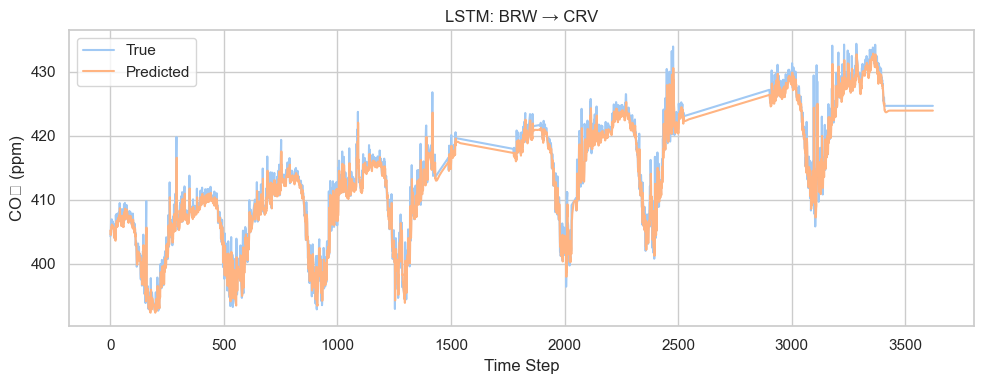

In [17]:
run_cross_station_transfer(
    corr_df,
    model_type='LSTM',          
    source_station='BRW',
    target_station='CRV',
    window_size=30,
    epochs=30
)


In [19]:
import pandas as pd

# LSTM migration test: BRW → All other sites, return MSE results
def cross_station_mse_lstm(corr_df, source_station='BRW', window_size=30, epochs=30):
    station_list = [col for col in corr_df.columns if col != source_station]
    mse_results = {}

    for target_station in station_list:
        try:
            source_series = corr_df[source_station].dropna()
            scaler = MinMaxScaler()
            source_scaled = scaler.fit_transform(source_series.values.reshape(-1, 1)).flatten()

            X_train, y_train = [], []
            for i in range(window_size, len(source_scaled)):
                X_train.append(source_scaled[i - window_size:i])
                y_train.append(source_scaled[i])
            X_train = np.array(X_train).reshape(-1, window_size, 1)
            y_train = np.array(y_train)

            model = build_model('LSTM', input_shape=(window_size, 1))
            model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0)

            target_series = corr_df[target_station].dropna()
            target_scaled = scaler.transform(target_series.values.reshape(-1, 1)).flatten()
            X_test, y_test = [], []
            for i in range(window_size, len(target_scaled)):
                X_test.append(target_scaled[i - window_size:i])
                y_test.append(target_scaled[i])
            X_test = np.array(X_test).reshape(-1, window_size, 1)
            y_test = np.array(y_test)

            preds_scaled = model.predict(X_test).flatten()
            y_pred = scaler.inverse_transform(preds_scaled.reshape(-1, 1)).flatten()
            y_true = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

            mse = mean_squared_error(y_true, y_pred)
            mse_results[target_station] = round(mse, 4)

        except Exception as e:
            mse_results[target_station] = f"Error: {str(e)}"

    return pd.DataFrame.from_dict(mse_results, orient='index', columns=['MSE'])


cross_station_mse_lstm(corr_df)


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


,MSE
AMT,23.8179
BAO,7.9784
CRV,4.0412
LEF,13.4397
MBO,1.9314
MLO,0.8183
SCT,16.1951
SMO,0.3706
SNP,16.4865
SPO,0.1867


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer=Adam(0.001))
    return model

def full_cross_station_mse_heatmap(corr_df, window_size=30, epochs=30):
    stations = corr_df.columns.tolist()
    mse_matrix = pd.DataFrame(index=stations, columns=stations)

    for source_station in stations:
        source_series = corr_df[source_station].dropna()
        if len(source_series) <= window_size + 10:
            print(f"Skipping source {source_station} (insufficient data)")
            continue

        scaler = MinMaxScaler()
        source_scaled = scaler.fit_transform(source_series.values.reshape(-1, 1)).flatten()

        X_train, y_train = [], []
        for i in range(window_size, len(source_scaled)):
            X_train.append(source_scaled[i - window_size:i])
            y_train.append(source_scaled[i])
        X_train = np.array(X_train).reshape(-1, window_size, 1)
        y_train = np.array(y_train)

        model = build_model(input_shape=(window_size, 1))
        model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0)

        for target_station in stations:
            if target_station == source_station:
                mse_matrix.loc[source_station, target_station] = np.nan
                continue

            target_series = corr_df[target_station].dropna()
            if len(target_series) <= window_size + 10:
                mse_matrix.loc[source_station, target_station] = np.nan
                continue

            try:
                target_scaled = scaler.transform(target_series.values.reshape(-1, 1)).flatten()
                X_test, y_test = [], []
                for i in range(window_size, len(target_scaled)):
                    X_test.append(target_scaled[i - window_size:i])
                    y_test.append(target_scaled[i])
                X_test = np.array(X_test).reshape(-1, window_size, 1)
                y_test = np.array(y_test)

                preds_scaled = model.predict(X_test).flatten()
                y_pred = scaler.inverse_transform(preds_scaled.reshape(-1, 1)).flatten()
                y_true = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

                mse = mean_squared_error(y_true, y_pred)
                mse_matrix.loc[source_station, target_station] = round(mse, 2)
            except Exception as e:
                print(f"Error on {source_station} → {target_station}: {e}")
                mse_matrix.loc[source_station, target_station] = np.nan

    plt.figure(figsize=(12, 10))
    sns.heatmap(mse_matrix.astype(float), annot=True, fmt=".2f", cmap="YlOrRd", linewidths=0.5)
    plt.title("LSTM Cross-Station Transfer MSE Heatmap")
    plt.xlabel("Target Station")
    plt.ylabel("Source Station")
    plt.tight_layout()
    plt.show()

    return mse_matrix


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 885us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step
577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step
559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step
577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step
559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step
577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step
559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step
577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step
577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step
577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step
577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step
577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step
577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step
577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step
577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step
577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step
577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step


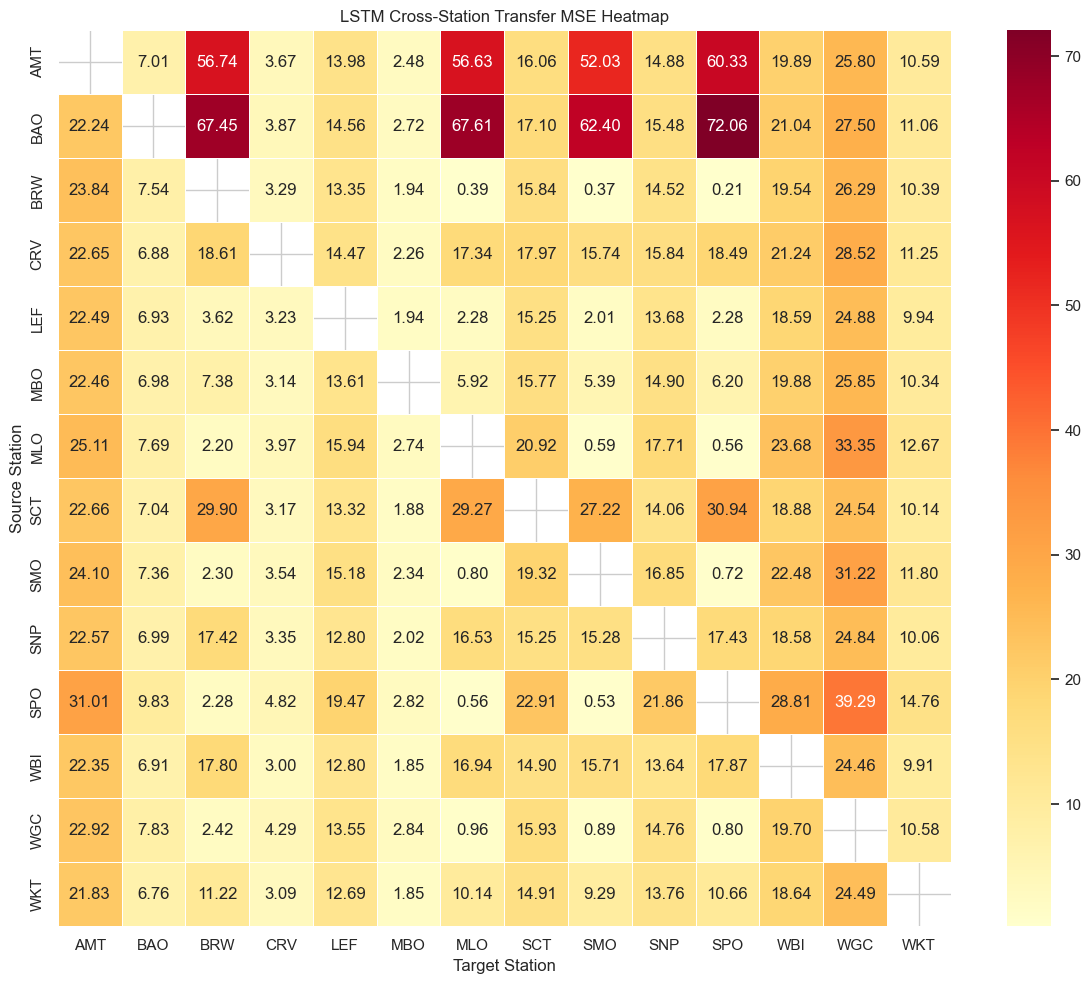

In [24]:
mse_matrix = full_cross_station_mse_heatmap(corr_df)


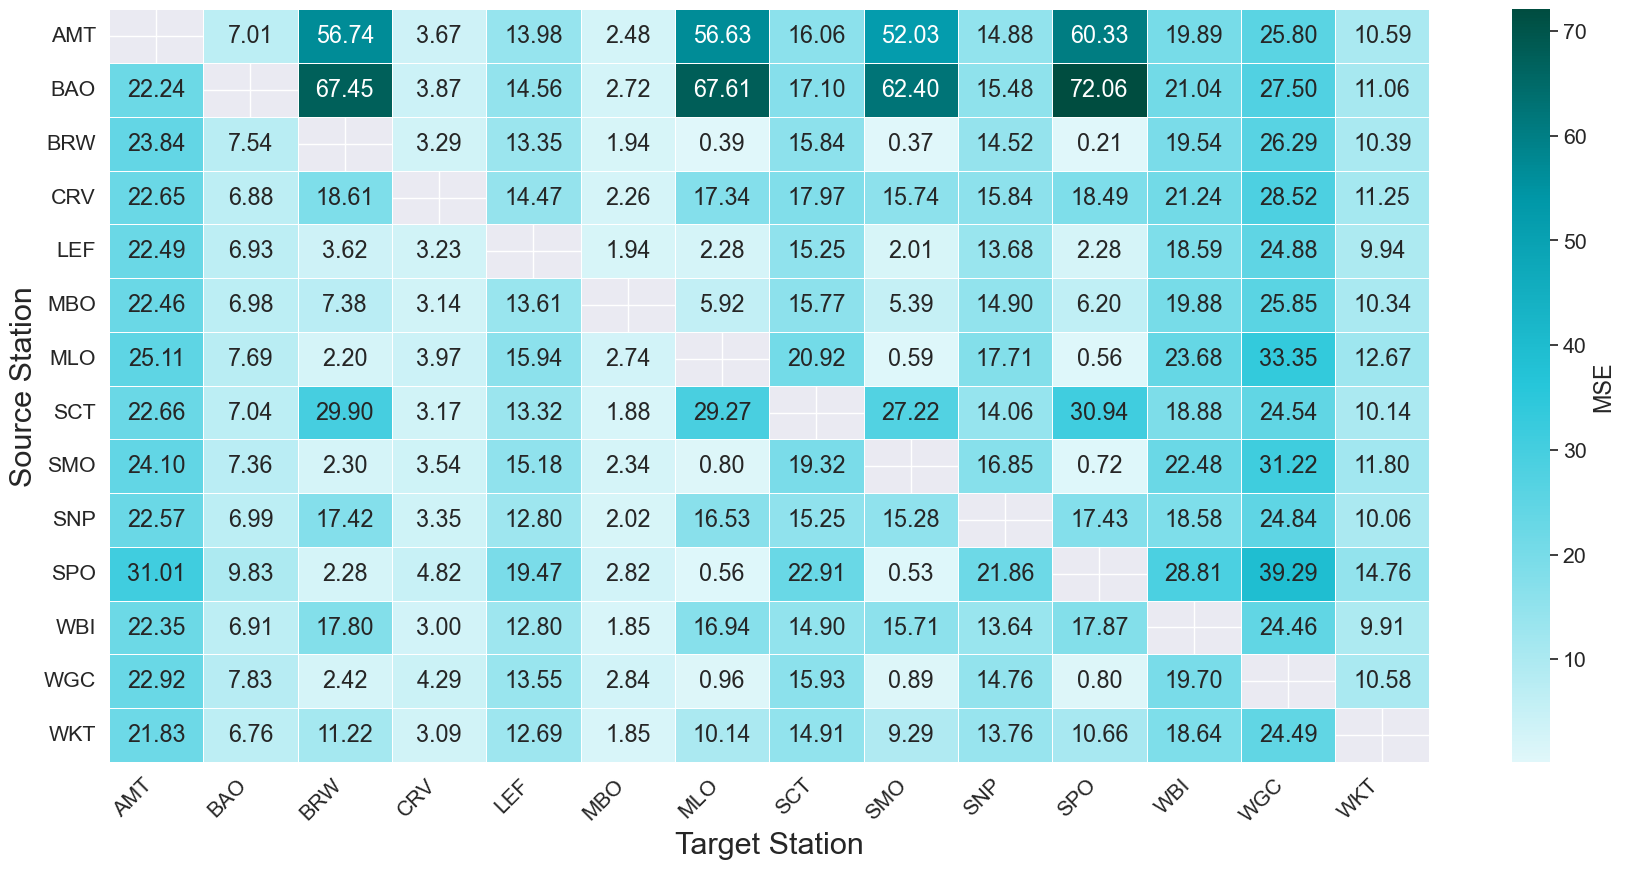

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list(
    "strong_blue_green",
    ["#e0f7fa", "#80deea", "#26c6da", "#0097a7", "#004d40"]
)

plt.figure(figsize=(18, 9))
sns.set(font_scale=1.4) 
sns.heatmap(
    mse_matrix.astype(float),
    annot=True,
    fmt=".2f",
    cmap=cmap,
    linewidths=0.5,
    cbar_kws={"label": "MSE"}
)
# plt.title("LSTM Cross-Station Transfer MSE Heatmap", fontsize=18)
plt.xlabel("Target Station", fontsize=22)
plt.ylabel("Source Station", fontsize=22)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [72]:
mean_mse_per_target = mse_matrix.mean(axis=0)
std_mse_per_target = mse_matrix.std(axis=0)

summary_df = pd.DataFrame({
    "Mean_MSE": mean_mse_per_target,
    "Std_MSE": std_mse_per_target
})
summary_df = summary_df.round(2).sort_values(by="Mean_MSE")

print("\n=== Target Station MSE Summary (Mean ± Std) ===")
print(summary_df)





=== Target Station MSE Summary (Mean ± Std) ===
      Mean_MSE    Std_MSE
MBO   2.283077   0.396114
CRV   3.571538   0.538854
BAO   7.365385   0.813773
WKT  11.037692   1.375416
LEF  14.286154    1.83446
SNP  15.533846    2.26169
SMO  15.957692  20.166743
SCT  17.086923   2.521899
MLO  17.336154  21.858874
SPO      18.35  23.338194
BRW  18.410769  21.287275
WBI  20.842308   2.859799
AMT  23.556154    2.41276
WGC  27.771538   4.427441


In [106]:
def multi_source_transfer_plot_each(corr_df, source_stations, target_stations, window_size=30, epochs=30):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics import mean_squared_error
    import numpy as np
    import matplotlib.pyplot as plt
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout
    from tensorflow.keras.optimizers import Adam

    def build_model(input_shape):
        model = Sequential()
        model.add(LSTM(64, input_shape=input_shape, return_sequences=False))
        model.add(Dropout(0.2))
        model.add(Dense(1))
        model.compile(loss='mse', optimizer=Adam(0.001))
        return model

    scaler = MinMaxScaler()
    X_train_all, y_train_all = [], []

    for station in source_stations:
        series = corr_df[station].dropna()
        if len(series) <= window_size + 10:
            continue
        scaled = scaler.fit_transform(series.values.reshape(-1, 1)).flatten()
        for i in range(window_size, len(scaled)):
            X_train_all.append(scaled[i - window_size:i])
            y_train_all.append(scaled[i])

    X_train = np.array(X_train_all).reshape(-1, window_size, 1)
    y_train = np.array(y_train_all)

    model = build_model(input_shape=(window_size, 1))
    model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0)

    results = {}
    for target_station in target_stations:
        try:
            target_series = corr_df[target_station].dropna()
            target_scaled = scaler.transform(target_series.values.reshape(-1, 1)).flatten()
            X_test, y_test = [], []
            for i in range(window_size, len(target_scaled)):
                X_test.append(target_scaled[i - window_size:i])
                y_test.append(target_scaled[i])
            X_test = np.array(X_test).reshape(-1, window_size, 1)
            y_test = np.array(y_test)

            preds_scaled = model.predict(X_test).flatten()
            y_pred = scaler.inverse_transform(preds_scaled.reshape(-1, 1)).flatten()
            y_true = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

            mse = mean_squared_error(y_true, y_pred)
            results[target_station] = round(mse, 2)

            # 画图
            plt.figure(figsize=(10, 4))
            plt.plot(y_true, label='True')
            plt.plot(y_pred, label='Predicted')
            plt.title(f"Multi-Source → {target_station} (LSTM), MSE: {mse:.2f}")
            plt.xlabel("Time Step")
            plt.ylabel("CO2 (ppm)")
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        except Exception as e:
            results[target_station] = f"Error: {e}"

    return results


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


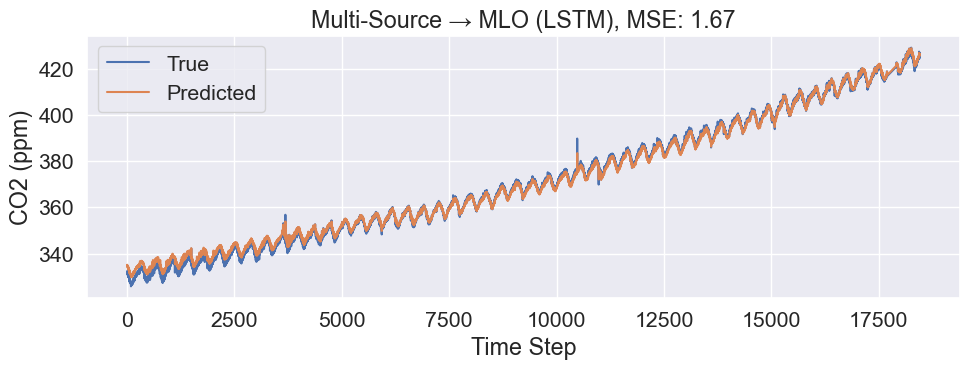

586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


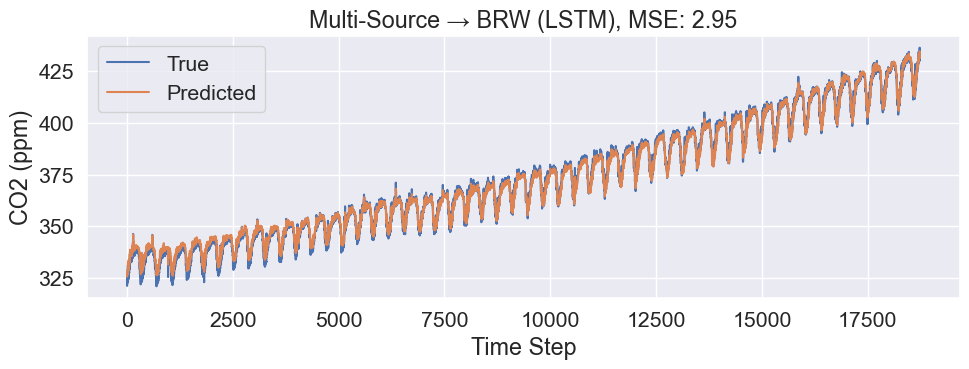

197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


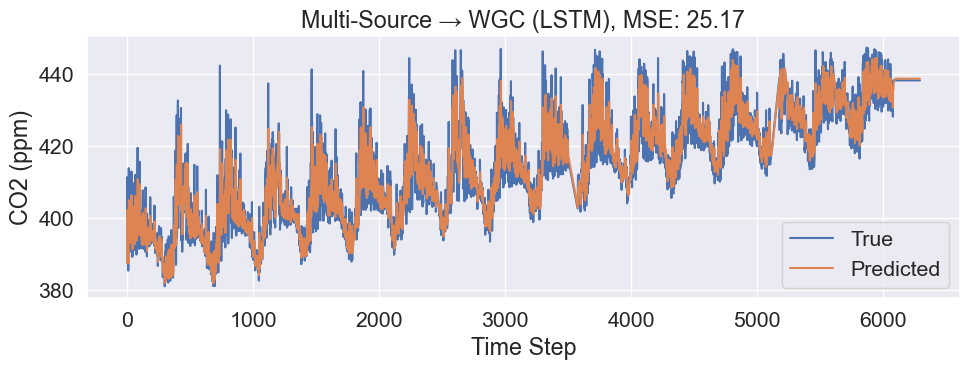

{'MLO': 1.67, 'BRW': 2.95, 'WGC': 25.17}


In [108]:
source_stations = ["MBO", "CRV", "BAO", "WKT", "LEF"]
target_stations = ["MLO", "BRW", "WGC"]

mse_results = multi_source_transfer_plot_each(corr_df, source_stations, target_stations)
print(mse_results)
